#### Assignment-4

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from keras.datasets import cifar10
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-info">
<b>1 : </b>Implement a simple feed-forward neural network model for the loan dataset in Keras and then evaluate the performance on a 80/20 split.
</div>

In [2]:
# Loading dataset
data=pd.read_csv(r"C:\Users\mohit\Downloads\loan.csv")
print(data.shape)
data['Decision'].replace({'reject':0,'accept':1},inplace=True)
data.head(5)

(429, 14)


,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,0
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,0
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,1
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,1
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,0


In [3]:
# creating feature and lable datasets
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
print(X.head(5))
print(y.head(5))

  Sex        Age  Time_at_address Res_status  Telephone Occupation Job_status  \
0   M  50.750000            0.585      owner      given  unemploye  unemploye   
1   M  19.670000           10.000       rent  not_given   labourer  governmen   
2   F  52.830002           15.000      owner      given  creative_  private_s   
3   M  22.670000            2.540       rent  not_given  creative_  governmen   
4   M  29.250000           13.000      owner      given     driver  governmen   

   Time_employed  Time_bank Liab_ref Acc_ref  Home_Expn  Balance  
0              0          0        f   given        145        0  
1              0          0        t   given        140        0  
2              5         14        f   given          0     2200  
3              2          0        f   given          0        0  
4              0          0        f   given        228        0  
0    0
1    0
2    1
3    1
4    0
Name: Decision, dtype: int64


In [4]:
#Using get_dummies function to encode the string values and int values into float values
X_dummy=pd.get_dummies(X,dtype=float)
#Splitting the test and train datasets into 80/20 ratio
X_train,X_test,y_train,y_test=train_test_split(X_dummy,y,test_size=0.2)

In [5]:
#Dummy dataset
print(X_dummy.shape)
X_dummy=X_dummy.astype('float32')
X_dummy.info()

(429, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   429 non-null    float32
 1   Time_at_address       429 non-null    float32
 2   Time_employed         429 non-null    float32
 3   Time_bank             429 non-null    float32
 4   Home_Expn             429 non-null    float32
 5   Balance               429 non-null    float32
 6   Sex_F                 429 non-null    float32
 7   Sex_M                 429 non-null    float32
 8   Res_status_owner      429 non-null    float32
 9   Res_status_rent       429 non-null    float32
 10  Telephone_given       429 non-null    float32
 11  Telephone_not_given   429 non-null    float32
 12  Occupation_creative_  429 non-null    float32
 13  Occupation_driver     429 non-null    float32
 14  Occupation_executive  429 non-null    float32
 15  Occupation_gu

In [6]:
#Splitting the dataset into 80/20 split
X_train,X_test,y_train,y_test=train_test_split(X_dummy,y,test_size=0.2,random_state=100)

In [7]:
#Building the model
#Two hidden layers:
    # 1. Activvation function: reLu
    # 2. Activvation function: reLu
model=Sequential([
    Dense(100,input_dim=35,activation='relu',name='Hidden-1'),
    Dense(100,activation='relu',name='Hidden-2'),
    Dense(1,activation='linear',name='Output')
])


In [8]:
#Compiling the model
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae','accuracy'])

In [9]:
#Running the model for 500 epochs
hist=model.fit(X_train,y_train,batch_size=32,epochs=500,validation_split=0.2)

Epoch 1/500
9/9 [==============================] - 1s 22ms/step - loss: 40739.6602 - mae: 44.0004 - accuracy: 0.5876 - val_loss: 4205.0122 - val_mae: 32.2156 - val_accuracy: 0.4348
Epoch 2/500
9/9 [==============================] - 0s 4ms/step - loss: 30879.1758 - mae: 43.7206 - accuracy: 0.5365 - val_loss: 1498.2903 - val_mae: 18.8413 - val_accuracy: 0.4348
Epoch 3/500
9/9 [==============================] - 0s 5ms/step - loss: 23413.5273 - mae: 35.0648 - accuracy: 0.4526 - val_loss: 839.1715 - val_mae: 13.7086 - val_accuracy: 0.5507
Epoch 4/500
9/9 [==============================] - 0s 5ms/step - loss: 9550.2744 - mae: 23.4113 - accuracy: 0.4818 - val_loss: 882.5897 - val_mae: 14.8892 - val_accuracy: 0.6377
Epoch 5/500
9/9 [==============================] - 0s 4ms/step - loss: 29949.6484 - mae: 38.4223 - accuracy: 0.6387 - val_loss: 271.3044 - val_mae: 7.1456 - val_accuracy: 0.4783
Epoch 6/500
9/9 [==============================] - 0s 4ms/step - loss: 6579.6880 - mae: 23.5770 - accura

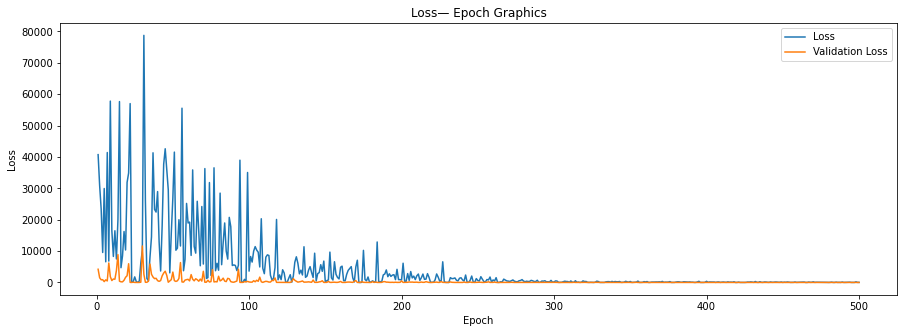

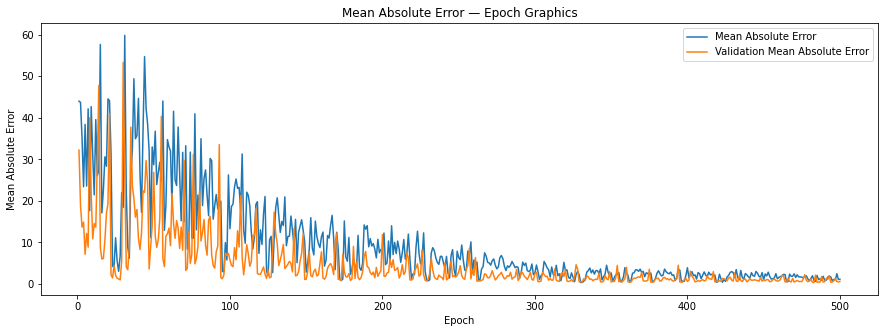

In [10]:
#Plotting the training loss and validation loss 
figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title("Loss— Epoch Graphics")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(range(1, len(hist.history["loss"]) + 1), hist.history["loss"])
plt.plot(range(1, len(hist.history["val_loss"]) + 1), hist.history["val_loss"])
plt.legend(["Loss", "Validation Loss"])
plt.show()

#plotting the Mean absolute error vs validation mean absolute error
figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title("Mean Absolute Error — Epoch Graphics")
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")
plt.plot(range(1, len(hist.history["mae"]) + 1), hist.history["mae"])
plt.plot(range(1, len(hist.history["val_mae"]) + 1), hist.history["val_mae"])
plt.legend(["Mean Absolute Error", "Validation Mean Absolute Error"])
plt.show()

In [11]:
#Printing the results of the model
result=model.evaluate(X_test,y_test)
for i in range(len(result)):
    print(f'{model.metrics_names[i]}-->{result[i]}')

3/3 [==============================] - 0s 1ms/step - loss: 9.7865 - mae: 1.1777 - accuracy: 0.7674
loss-->9.786544799804688
mae-->1.1776691675186157
accuracy-->0.7674418687820435


In [12]:
#Accuracy of the model = 76.744%
print(f'{model.metrics_names[2]}-->{result[i]*100}','%')

accuracy-->76.74418687820435 %


<div class="alert alert-block alert-info">
<b>2 : </b>Read CNN modeling and implement a couple of different configurations in Keras for classifying cifar-10 images and then compare performances on a 90/10 split.
</div>

In [8]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [9]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Checking the number of rows (records) and columns (features)
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
# Checking the number of unique classes 
print(np.unique(train_labels))
print(np.unique(test_labels))

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [10]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

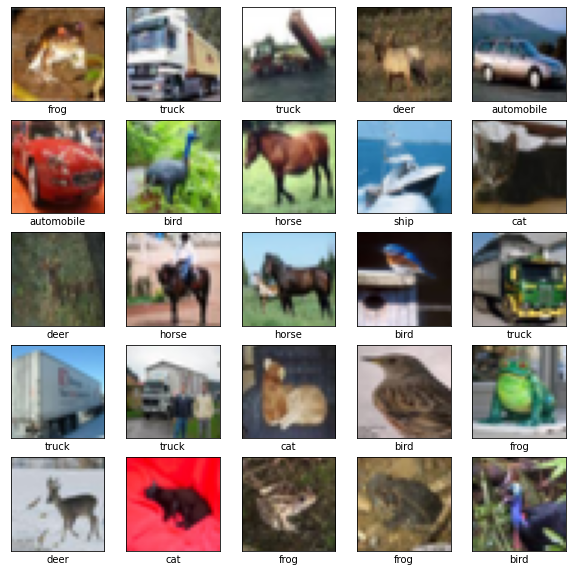

In [11]:
# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()

> #### Basic Model

In [12]:
# Converting the pixels data to float type
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
 
# Standardizing (255 is the total number of pixels an image can have)
train_images = train_images / 255
test_images = test_images / 255 

# One hot encoding the target class (labels)
num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

##### Regularization
Deep neural nets with a large number of parameters are very powerful machine learning systems. However, overfitting is a serious problem in such networks. 

- ###### Dropout
Dropout is a technique for addressing this problem. The key idea is to randomly drop units (along with their connections) from the neural network during training. The reduction in number of parameters in each step of training has effect of regularization. Dropout has shown improvements in the performance of neural networks on supervised learning tasks in vision, speech recognition, document classification and computational biology, obtaining state-of-the-art results on many benchmark data sets.

- ###### Kernel_regularizer
Kernel_regularizer  allows to apply penalties on layer parameters during optimization. These penalties are incorporated in the loss function that the network optimizes. This argument in convolutional layer  is nothing but L2 regularisation of the weights. This penalizes peaky weights and makes sure that all the inputs are considered. During gradient descent parameter update, the above L2 regularization ultimately means that every weight is decayed linearly, that’s why called weight decay.

- ###### BatchNormalization
BatchNormalization normalizes the activation of the previous layer at each batch, i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. It addresses the problem of internal covariate shift. It also acts as a regularizer, in some cases eliminating the need for Dropout. Batch Normalization achieves the same accuracy with fewer training steps thus speeding up the training process .

In [13]:
# Creating a sequential model and adding layers to it

#Initiaing a sequential model
model = Sequential()

#First hidden layer
#
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [17]:
#Compiling the model
# Learning rate =Adam, metric of measure = Accuracy
model.compile(optimizer='Adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [35]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
391/391 [==============================] - 356s 912ms/step - loss: 0.4911 - accuracy: 0.8310 - val_loss: 0.5048 - val_accuracy: 0.8284
Epoch 2/5
391/391 [==============================] - 356s 912ms/step - loss: 0.4815 - accuracy: 0.8350 - val_loss: 0.5207 - val_accuracy: 0.8248
Epoch 3/5
391/391 [==============================] - 310s 793ms/step - loss: 0.4628 - accuracy: 0.8399 - val_loss: 0.5538 - val_accuracy: 0.8193
Epoch 4/5
391/391 [==============================] - 330s 844ms/step - loss: 0.4599 - accuracy: 0.8396 - val_loss: 0.5137 - val_accuracy: 0.8298
Epoch 5/5
391/391 [==============================] - 307s 785ms/step - loss: 0.4530 - accuracy: 0.8446 - val_loss: 0.5746 - val_accuracy: 0.8094


Text(0.5, 1.0, 'Loss Curves')

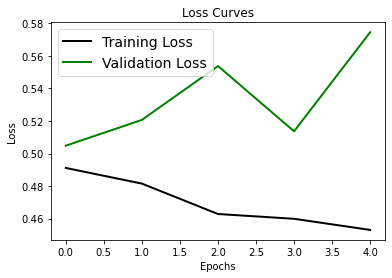

In [36]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

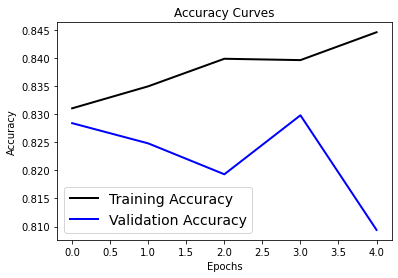

In [37]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [38]:
# Making the Predictions
pred = model.predict(test_images)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

[[3.5004210e-05 2.9600787e-05 9.8273240e-04 ... 6.6205219e-05
  8.6136633e-06 6.7535175e-06]
 [4.1314293e-06 3.1224918e-04 6.5308964e-10 ... 3.9483337e-11
  9.9968207e-01 1.5239797e-06]
 [4.3588014e-05 8.5666962e-03 7.1119143e-07 ... 7.3271153e-08
  9.9117494e-01 2.0793448e-04]
 ...
 [3.7264855e-10 5.9415598e-08 3.2961812e-05 ... 1.7134465e-05
  1.3080110e-08 2.0031292e-08]
 [1.0959436e-01 8.6272115e-01 3.2100352e-04 ... 1.2523007e-04
  3.8823095e-04 9.8206000e-03]
 [1.8420686e-06 1.1366278e-06 1.3597591e-05 ... 9.9174774e-01
  1.5065292e-07 1.8747868e-06]]
[3 8 8 ... 5 1 7]


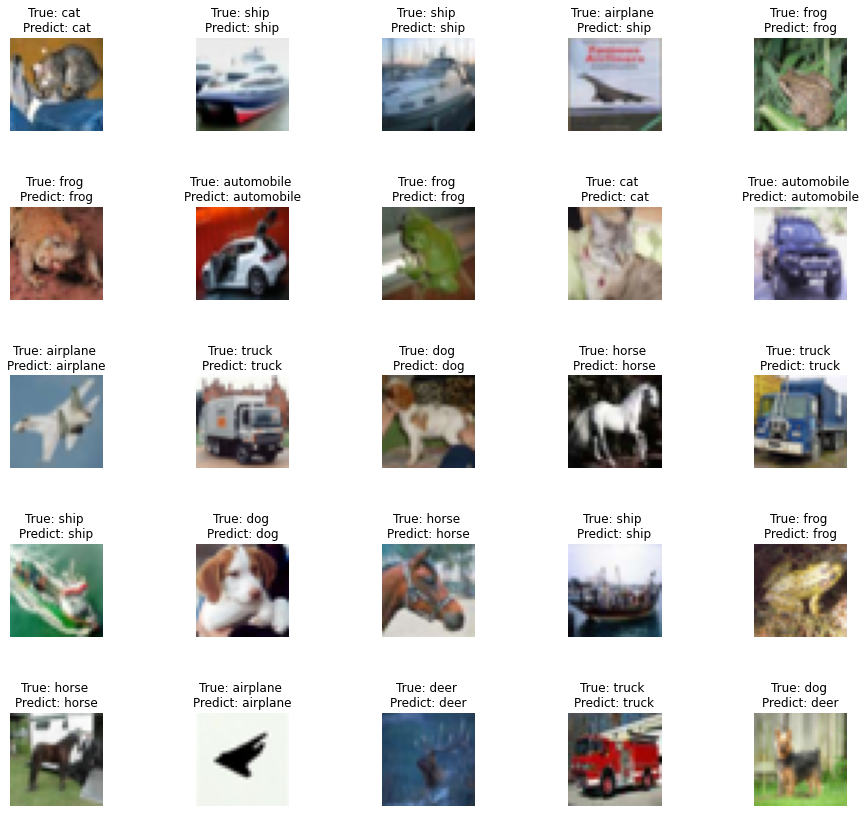

In [39]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

#### For loop for different bacthsize and epochs - The model is the same as above just inside a for loop

In [44]:
epochs=[2,5,10]
batchsizes=[32,68,128]
for epoch in epochs:
    for batchsize in batchsizes:
        history = model.fit(train_images, train_labels, batch_size=batchsize, epochs=epoch,
                    validation_data=(test_images, test_labels))
        # Loss curve
        plt.figure(figsize=[6,4])
        plt.plot(history.history['loss'], 'black', linewidth=2.0)
        plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
        plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
        plt.xlabel('Epochs', fontsize=10)
        plt.ylabel('Loss', fontsize=10)
        plt.title('Loss Curves', fontsize=12)
        
        # Accuracy curve
        plt.figure(figsize=[6,4])
        plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
        plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
        plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
        plt.xlabel('Epochs', fontsize=10)
        plt.ylabel('Accuracy', fontsize=10)
        plt.title('Accuracy Curves', fontsize=12)
        
       # Plotting the Actual vs. Predicted results
        fig, axes = plt.subplots(5, 5, figsize=(15,15))
        axes = axes.ravel()
        for i in np.arange(0, 25):
            axes[i].imshow(test_images[i])
            axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
            axes[i].axis('off')
            plt.subplots_adjust(wspace=1) 
        

Epoch 1/2
   8/1563 [..............................] - ETA: 6:56 - loss: 0.4173 - accuracy: 0.8555

KeyboardInterrupt: 